In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("website.csv")
df.head()

,duration,page
0,9.1,target
1,9.7,standard
2,10.0,target
3,10.3,standard
4,11.1,standard


<AxesSubplot:xlabel='page', ylabel='duration'>

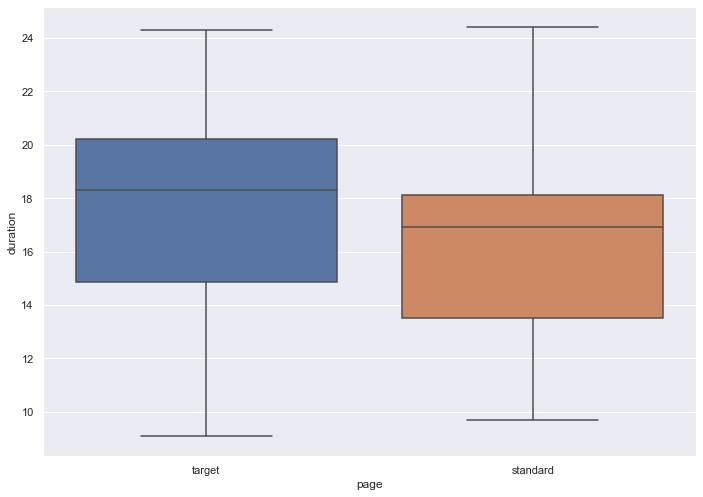

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = "page", y = "duration", data = df)

In [4]:
from scipy.stats import iqr
tab = df.groupby("page")["duration"].agg(n=len, 
                                               mean=np.mean, 
                                               median=np.median,
                                               sd=np.std,
                                               iqr=iqr,
                                               min=min,
                                               max=max)
print(tab)

             n       mean  median        sd   iqr  min   max
page                                                        
standard  29.0  16.248276    16.9  3.640999  4.60  9.7  24.4
target    27.0  17.418519    18.3  3.949005  5.35  9.1  24.3


In [5]:
def t_stat(y, x):
    data = pd.DataFrame({"y": y, "x": x})
    group_data = data.groupby("x")["y"]
    # observed n, mean, sd
    n = group_data.size().to_numpy()
    m = group_data.median().to_numpy()
    s = group_data.std().to_numpy()
    
    # pooled variance and t-statistic
    pvar = (n[0] + n[1]) / (n[0] * n[1]) * \
    ((n[0] - 1) * s[0]**2 + (n[1] - 1) * s[1]**2) / (n[0] + n[1] - 1)
    tstat = (m[0] - m[1]) / np.sqrt(pvar)
    
    return tstat

In [6]:
def t_test(y, x, nperm = 100000):
    # observed statistic
    stat = t_stat(y, x)
    ## statistic for permutations
    perm = np.zeros(nperm)
    for i in range(1, nperm): 
        perm[i] = t_stat(np.random.permutation(y), x)
        
    # return everything in a dictionary
    tperm = {"statistic":[], "pvalue":[], "method":[], "permutations":[]}
    tperm["statistic"].append(stat)
    tperm["pvalue"].append(np.mean(np.abs(perm) >= np.abs(stat)))
    tperm["method"].append("Permutation t-test")
    tperm["permutations"].append(perm)
    
    return tperm

In [7]:
tperm_m = t_test(y=df["duration"], x=df["page"])
print(tperm_m)

{'statistic': [-1.393101284526614], 'pvalue': [0.29742], 'method': ['Permutation t-test'], 'permutations': [array([ 0.        , -1.37844311, -1.2913467 , ..., -0.2958791 ,
       -0.59167905, -0.2950937 ])]}


In [8]:
from scipy import (              
    misc, stats, ndimage)

Нулевая гипотеза: x=y
Альтернативная гипотеза: !(x=y)
9.0
102.39999999999998
49.599999999999994
1
8
p=0.0036133227060699963 , Итог: отклоняем нулевую гипотезу


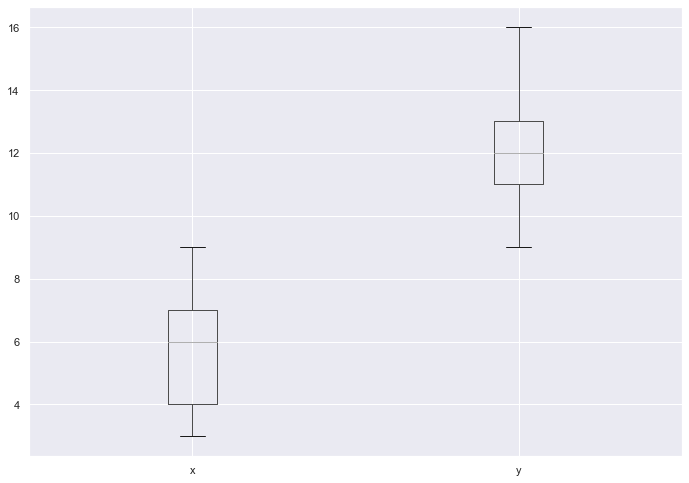

In [9]:
data = pd.DataFrame({
           'x': [3, 6, 7, 9, 4],
           'y': [9, 12, 13, 16, 11],
          })
data.boxplot()

print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')

# общая средняя
grand_mean = data.values.flatten().mean()
print(grand_mean)
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
print(ssb)
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())
print(ssw)
groups = data.shape[1]
dfb = groups - 1
print(dfb)
dfw = data.size - groups
print(dfw)
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)\

print("p={} , Итог: {}".format(
    p,
    "отклоняем нулевую гипотезу" if p < 0.05 else "НЕ отклоняем нулевую гипотезу"
))